In [1]:
# the required imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
# loading the random policy results
path = '/home/mawongh/ws/datasets/model-based_results/'
rnd = pd.read_csv(path + '170821_randompolicy_for_benchmark.csv')
g00_e01 = pd.read_csv(path + '170822_model-based_history_g00_e_01.csv')
g00_e03 = pd.read_csv(path + '170820_model-based_history_g00_e_03.csv')
g00_e05 = pd.read_csv(path + '170823_model-based_history_g00_e_05.csv')
data = pd.concat([rnd, g00_e01, g00_e03, g00_e05], ignore_index=True)
names = data.columns.values
names[1] = 'step'
data.columns = names
data.tail(3)

,00_episode,step,state,action,reward,new_state,epsilon,terminal
39997,19,497,[ 0. 0. 0. 0. ...,65,-0.064900,[ 0. 0. 0. 0. ...,0.5,False
39998,19,498,[ 0. 0. 0. 0. ...,17,0.433601,[ 0. 0. 0. 0. ...,0.5,False
39999,19,499,[ 0. 0. 0. 0. ...,110,-0.322321,[ 0. 0. 0. 0. ...,0.5,False


/home/mawongh/anaconda3/envs/rl/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


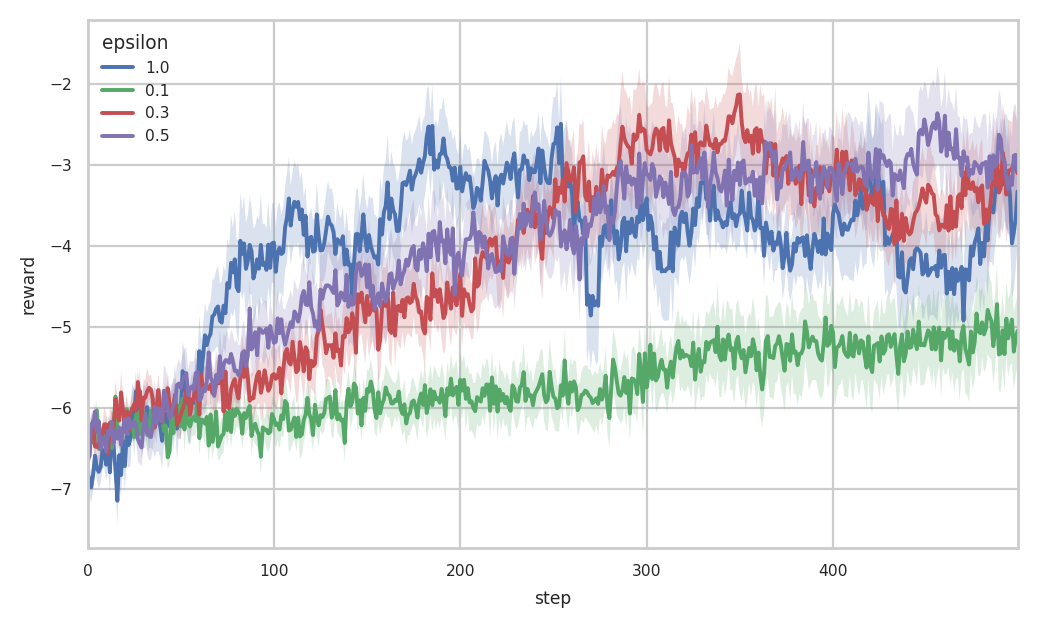

In [37]:
sns.set()
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=0.7)
plt.figure(figsize = (6,3.5), dpi = 200)
sns.tsplot(data = data, time = 'step', value = 'reward',
           unit='00_episode', condition = 'epsilon')
plt.show()

In [ ]:
# creates a barplot showing the action distribution
ticks = np.unique(rhat)
# plt.figure(figsize = (6,1), dpi = 200)
# plt.hist(rhat, bins=126)
# plt.xticks(ticks)
# plt.show()
sns.set()
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=0.6)
plt.figure(figsize = (1.7,5), dpi = 200)
sns.distplot(rhat, bins=126, hist=True, kde=False, axlabel='action', vertical=True,
            hist_kws={"linewidth": 2,
                      "alpha": 1, "color": "b"})
plt.yticks(ticks)
plt.xlabel('frequency')
plt.show()


In [ ]:
# processing the data for a heatmap of the value function
Rhat = [model.predict(np.array(s).reshape(1,-1))[0]
        for s in unique_states_df.state_norm.tolist()]
# and storing it in a dataframe
data = pd.DataFrame(data = np.array(Rhat),columns = np.arange(126).astype(str))

In [ ]:
data_flat = np.array(Rhat).flatten()

In [ ]:
plt.hist(data_flat, bins=5000)
plt.show()

In [ ]:
np.mean(data_flat)

In [ ]:
# displaying the heatmap
plt.figure(figsize=(4,5), dpi = 200)
sns.set()
sns.set_style("ticks")
sns.set_context("paper", font_scale=0.6)
# sns.axes_style({'ytick.color': '.5'})
# sns.heatmap(data = data, cmap = 'RdBu', vmin=-10, vmax = +5, center = -4, yticklabels=False)
sns.heatmap(data = data, cmap = 'YlGnBu', vmin = -90, center = -60,vmax = -40, yticklabels=False)

plt.xlabel('action')
plt.ylabel('sampled states')
plt.show()